In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/imdb_top_1000.csv')

In [ ]:
df = df.drop('Poster_Link', axis = 1)
df = df.drop('Overview', axis = 1)
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Runtime'] = pd.to_numeric(df['Runtime'])
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,Lifeboat,1944,NaN,97,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


Анализ данных о фильмах и сериалах\развлекательных шоу
Использовать один из открыто распространяемых наборов данных. Проанализировать популярность жанров, рейтинги фильмов, годы выпусков или другую, на своё предпочтение, интересную информацию. Построить графики визуализации предпочтений зрителей.


In [ ]:
df['Genre'] = df['Genre'].str.split(',')
df_exploded = df.explode('Genre')
df_exploded['Genre'] = df_exploded['Genre'].str.strip()


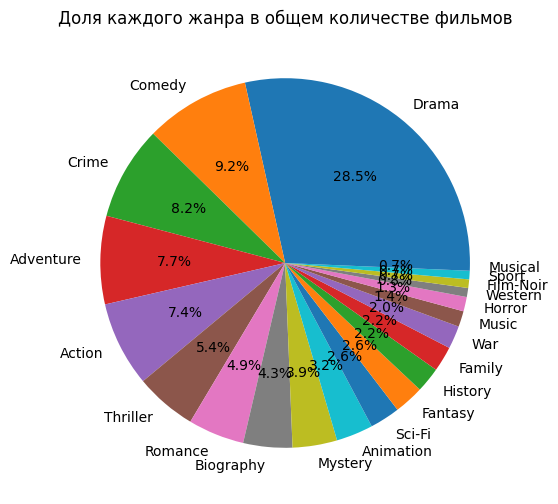

In [ ]:
genre_counts = df_exploded['Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Доля каждого жанра в общем количестве фильмов')
plt.ylabel('')
plt.show()

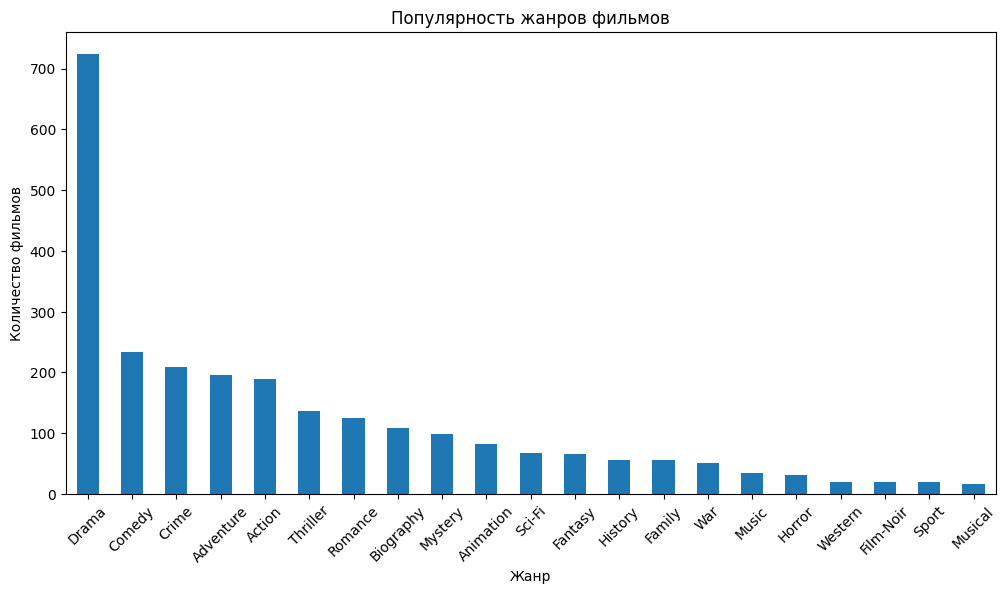

In [ ]:
genre_popularity = df_exploded.groupby('Genre')['Series_Title'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_popularity.plot(kind='bar')
plt.title('Популярность жанров фильмов')
plt.ylabel('Количество фильмов')
plt.xlabel('Жанр')
plt.xticks(rotation=45)
plt.show()

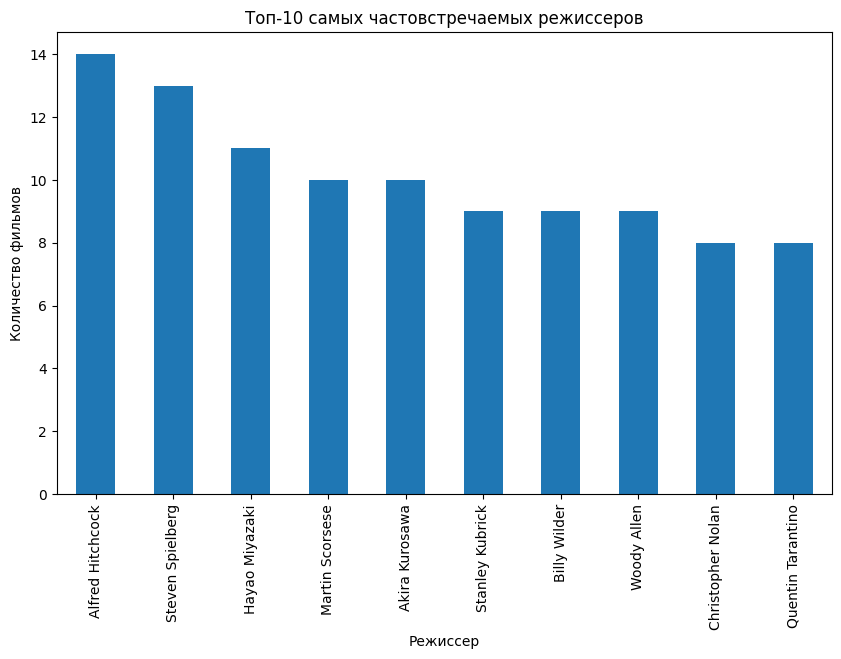

In [ ]:
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar')
plt.title('Топ-10 самых частовстречаемых режиссеров')
plt.xlabel('Режиссер')
plt.ylabel('Количество фильмов')
plt.show()

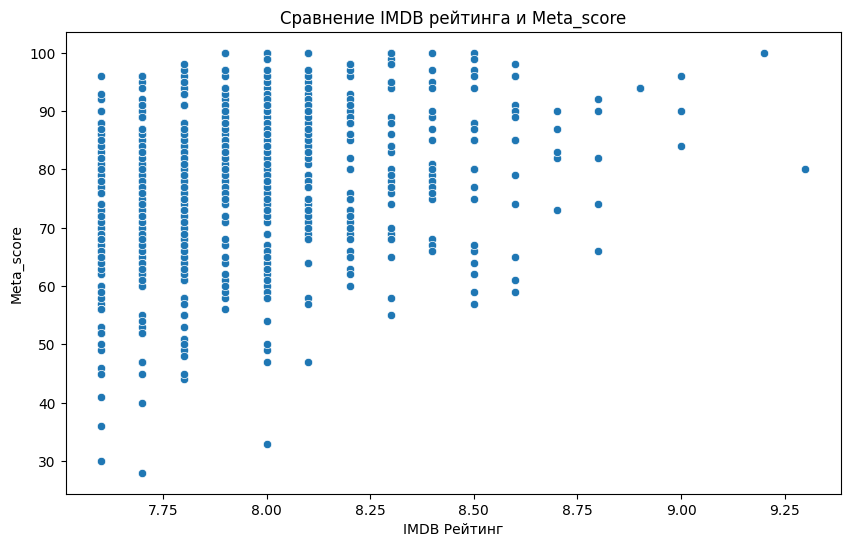

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Meta_score', data=df)
plt.title('Сравнение IMDB рейтинга и Meta_score')
plt.xlabel('IMDB Рейтинг')
plt.ylabel('Meta_score')
plt.show()

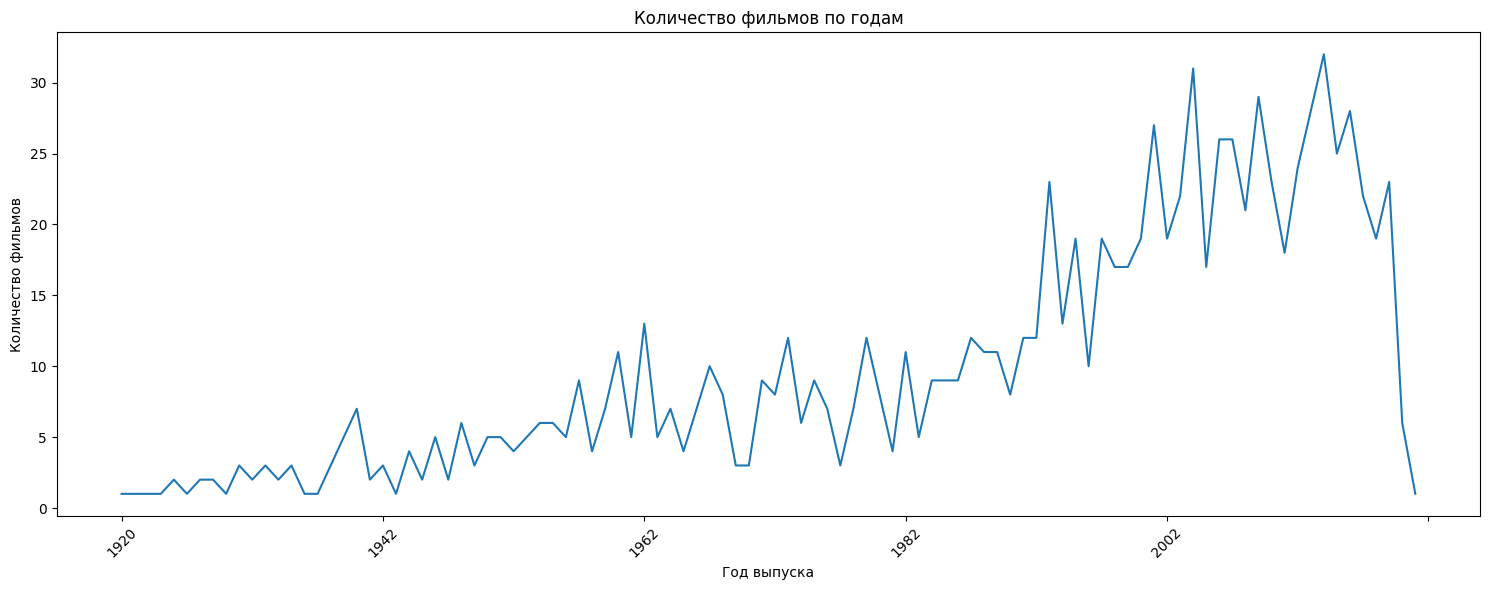

In [ ]:
movies_by_year = df.groupby('Released_Year')['Series_Title'].count()

plt.figure(figsize=(15, 6))
movies_by_year.plot()
plt.title('Количество фильмов по годам')
plt.ylabel('Количество фильмов')
plt.xlabel('Год выпуска')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

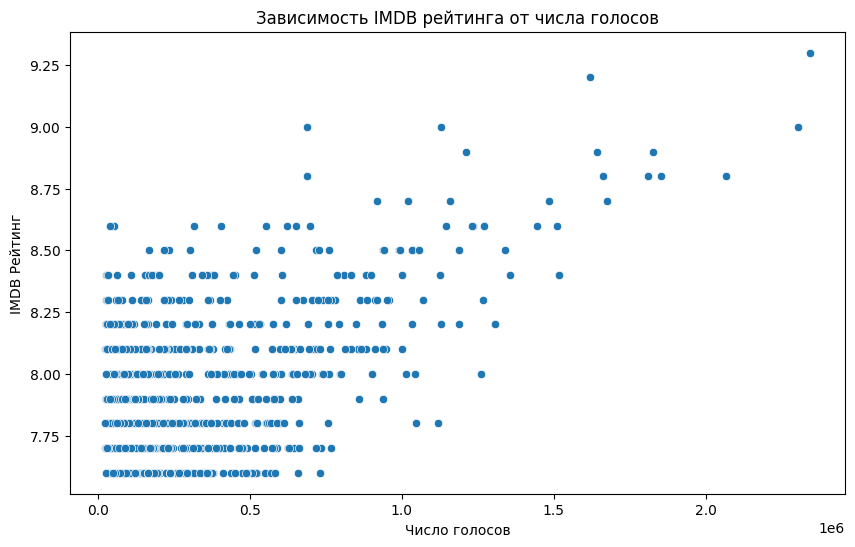

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='No_of_Votes', y='IMDB_Rating', data=df)
plt.title('Зависимость IMDB рейтинга от числа голосов')
plt.xlabel('Число голосов')
plt.ylabel('IMDB Рейтинг')
plt.show()

<ipython-input-16-1613c4d9c852>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB_Rating', y='Genre', data=genre_ratings, palette='coolwarm')


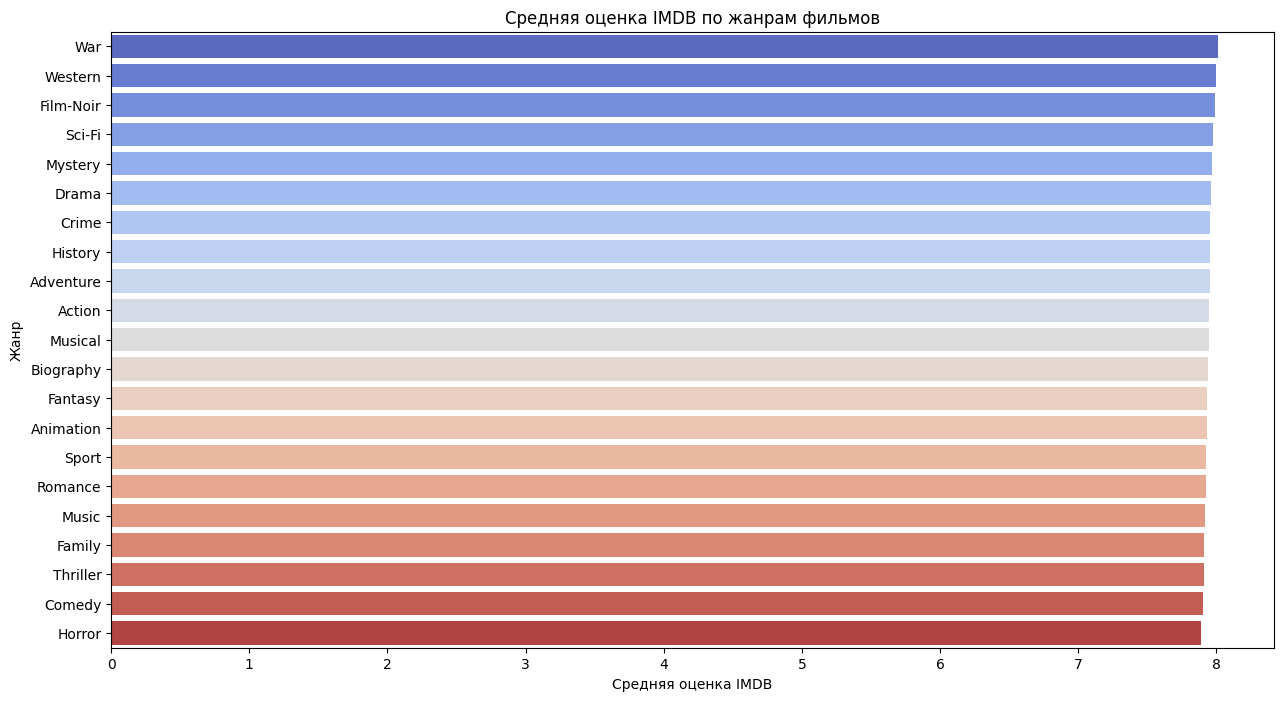

In [ ]:
genre_ratings = df_exploded.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='IMDB_Rating', y='Genre', data=genre_ratings, palette='coolwarm')
plt.title('Средняя оценка IMDB по жанрам фильмов')
plt.xlabel('Средняя оценка IMDB')
plt.ylabel('Жанр')
plt.show()

<ipython-input-17-b72f413a820f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB_Rating', y='Certificate', data=certificate_ratings, palette='viridis')


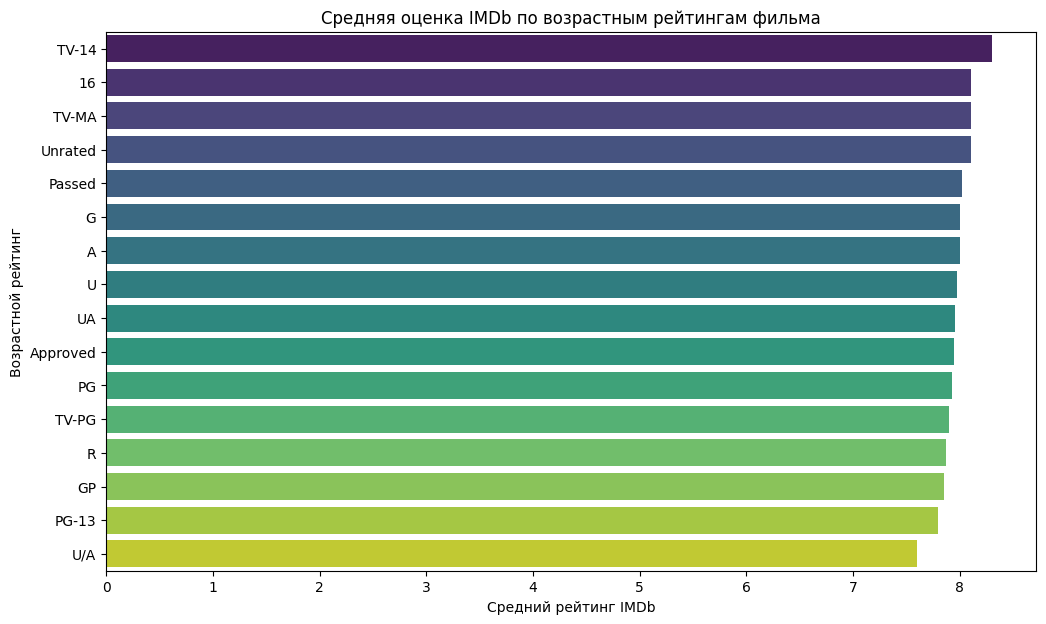

In [ ]:
certificate_ratings = df.groupby('Certificate')['IMDB_Rating'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='IMDB_Rating', y='Certificate', data=certificate_ratings, palette='viridis')
plt.title('Средняя оценка IMDb по возрастным рейтингам фильма')
plt.xlabel('Средний рейтинг IMDb')
plt.ylabel('Возрастной рейтинг')
plt.show()

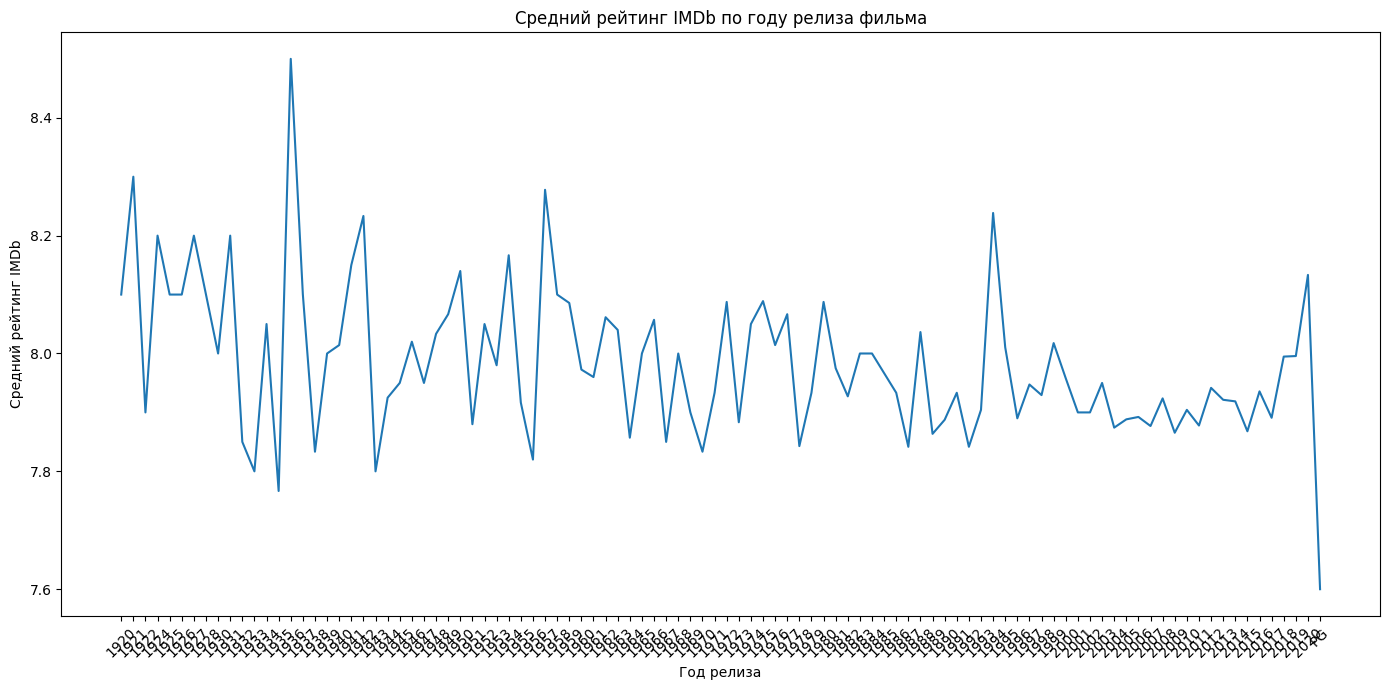

In [ ]:
average_rating_per_year = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

# Сортировка данных по году релиза
average_rating_per_year = average_rating_per_year.sort_values('Released_Year', ascending=True)

# Построение графика
plt.figure(figsize=(14, 7))
sns.lineplot(x='Released_Year', y='IMDB_Rating', data=average_rating_per_year)
plt.title('Средний рейтинг IMDb по году релиза фильма')
plt.xlabel('Год релиза')
plt.ylabel('Средний рейтинг IMDb')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

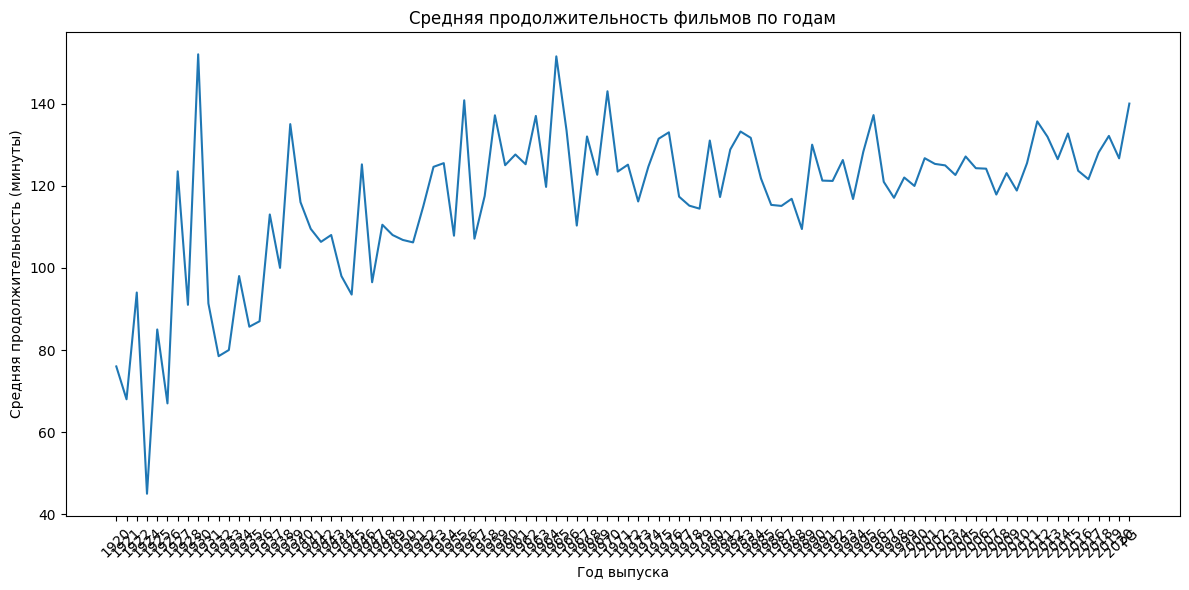

In [ ]:
average_runtime_by_year = df.groupby('Released_Year')['Runtime'].mean().reset_index()

# Сортировка данных по году выпуска (при наличии немонотонных данных)
average_runtime_by_year = average_runtime_by_year.sort_values('Released_Year')

# Построение графика
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_runtime_by_year, x='Released_Year', y='Runtime')
plt.title('Средняя продолжительность фильмов по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя продолжительность (минуты)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

# Рассчитываем корреляционную матрицу для числовых столбцов
correlation_matrix = numeric_df.corr()

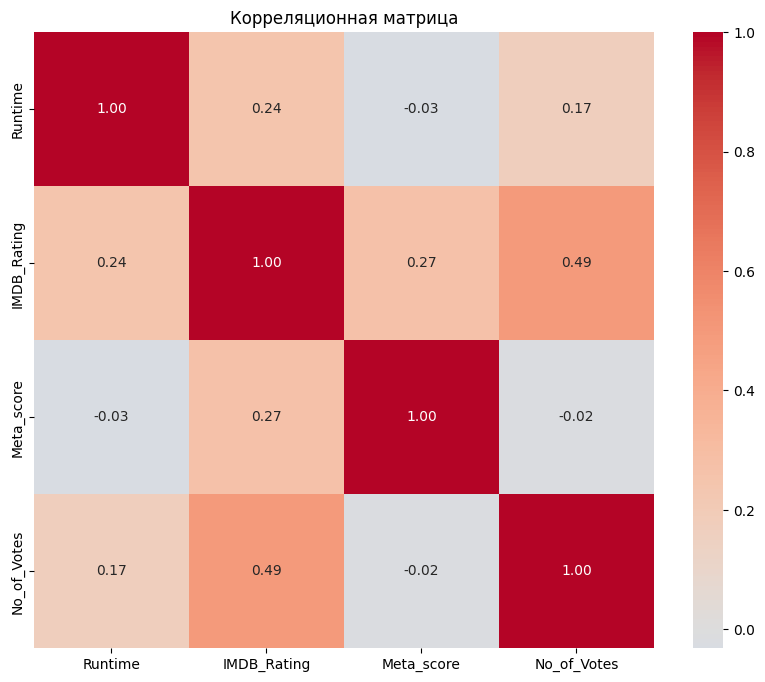

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Корреляционная матрица")
plt.show()